## NOTES:
* embedded is code to calculate each star school rank breakdown of absences percentages
* embedded is code to extract school_ward_int and school_cluster_int columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/cleaned/school_df_v3.csv')

<br><br>
## Added in columns to look at Cluster and Ward as integer values

In [3]:
import re as re

def extract_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

data['school_ward_int'] = data['school_ward'].apply(lambda x: extract_number(x))
data['school_cluster_int'] = data['school_cluster'].apply(lambda x: extract_number(x))

<br><br>
## Generate Values and Summary Report for Absence Percentages Breakdown per Star Rating
* current code is worded for every star (1-5) for SY1718

In [4]:
for i in range(1,6):
    
    print(f'SY1718 Star Rank of {i}: Summary')
    
    star_rank_df = data[data['school_star_rating_SY1718'] == i]

    count_enrolled = star_rank_df['school_enrollment_SY1718'].sum()
    count_any = star_rank_df['students_with_absences_SY1718'].sum()
    count_0 = star_rank_df['school_enrollment_SY1718'].sum()-star_rank_df['students_with_absences_SY1718'].sum()
    count_1_5 = star_rank_df['attnd_absence_1-5_SY1718'].sum()
    count_6_10 = star_rank_df['attnd_absence_6-10_SY1718'].sum()
    count_11_20 = star_rank_df['attnd_absence_11-20_SY1718'].sum()
    count_20plus = star_rank_df['attnd_absence_20+_SY1718'].sum()
    
    pct_0 = (star_rank_df['school_enrollment_SY1718'].sum()-star_rank_df['students_with_absences_SY1718'].sum())/star_rank_df['school_enrollment_SY1718'].sum()
    pct_1_5 = star_rank_df['attnd_absence_1-5_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_6_10 = star_rank_df['attnd_absence_6-10_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_11_20 = star_rank_df['attnd_absence_11-20_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_20plus = star_rank_df['attnd_absence_20+_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    
    print('count of students in rank ', i, ' school:', count_enrolled)
    print('count of students in rank ', i, ' school with any absences:', count_any)
    print('count of students in rank ', i, ' school with no absences:', count_0)
    print('percent of rank ', i, ' school students with no absences:', pct_0)
    print('count of students in rank ', i, ' school with 1-5 absences:', count_1_5)
    print('percent of rank ', i, ' school students with 1-5 absences:', pct_1_5)
    print('count of students in rank ', i, ' school with 6-10 absences:', count_6_10)
    print('percent of rank ', i, ' school students with 6-10 absences:', pct_6_10)
    print('count of students in rank ', i, ' school with 11-20 absences:', count_11_20)
    print('percent of rank ', i, ' school students with 11-20 absences:', pct_11_20)
    print('count of students in rank ', i, ' school with 20+ absences:', count_20plus)
    print('percent of rank ', i, ' school students with 20+ absences:', pct_20plus)
    print('\n')

SY1718 Star Rank of 1: Summary
count of students in rank  1  school: 5630.0
count of students in rank  1  school with any absences: 5149.0
count of students in rank  1  school with no absences: 481.0
percent of rank  1  school students with no absences: 0.08543516873889875
count of students in rank  1  school with 1-5 absences: 1111.0
percent of rank  1  school students with 1-5 absences: 0.19733570159857905
count of students in rank  1  school with 6-10 absences: 982.0
percent of rank  1  school students with 6-10 absences: 0.1744227353463588
count of students in rank  1  school with 11-20 absences: 1107.0
percent of rank  1  school students with 11-20 absences: 0.1966252220248668
count of students in rank  1  school with 20+ absences: 1949.0
percent of rank  1  school students with 20+ absences: 0.34618117229129663


SY1718 Star Rank of 2: Summary
count of students in rank  2  school: 10583.0
count of students in rank  2  school with any absences: 9150.0
count of students in rank  2 

<br><br>
## Generate Pie Charts for Absence Percentages Breakdown per Star Rating
* current code is worded for every star (1-5) for SY1718

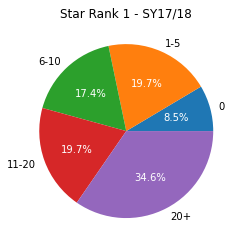

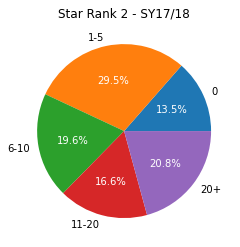

<ipython-input-5-6bb9e68f5ddf>:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts))


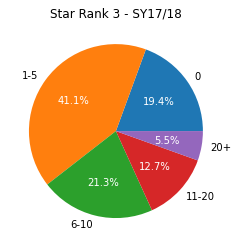

<ipython-input-5-6bb9e68f5ddf>:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts))


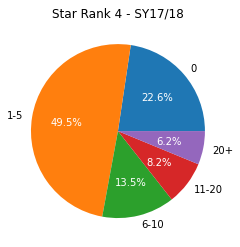

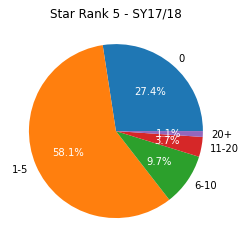

In [5]:
def func(pct, values): 
    absolute = int(pct / 100.*np.sum(values)) 
    return "{:.1f}%".format(pct, absolute)

for i in range(1,6):

    star_rank_df = data[data['school_star_rating_SY1718'] == i]

    pct_0 = (star_rank_df['school_enrollment_SY1718'].sum()-star_rank_df['students_with_absences_SY1718'].sum())/star_rank_df['school_enrollment_SY1718'].sum()
    pct_1_5 = star_rank_df['attnd_absence_1-5_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_6_10 = star_rank_df['attnd_absence_6-10_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_11_20 = star_rank_df['attnd_absence_11-20_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_20plus = star_rank_df['attnd_absence_20+_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()

    pcts = np.array([pct_0,pct_1_5,pct_6_10,pct_11_20,pct_20plus])
    pct_labels = ["0", "1-5", "6-10", "11-20", "20+"]

    wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts))

    plt.setp(autotexts, size = 10, color='white')
    plt.title(f'Star Rank {i} - SY17/18')
    plt.show()

<br><br>
## Code to create dataframe of only static school identification values (code, ward, cluster, etc.) and columns pertaining to SY1819 and FY17

In [6]:
data.drop(columns = data.filter(regex='SY1718$',axis=1)).drop(columns = data.filter(regex='FY16$',axis=1))

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,pct_of_absences_1-5_SY1819,pct_of_student_absences_1-5_SY1819,pct_of_absences_6-10_SY1819,pct_of_student_absences_6-10_SY1819,pct_of_absences_11-20_SY1819,pct_of_student_absences_11-20_SY1819,pct_of_absences_20+_SY1819,pct_of_student_absences_20+_SY1819,school_ward_int,school_cluster_int
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.313514,0.237705,0.329730,0.250000,0.243243,0.184426,0.113514,0.086066,7,31
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.494382,0.389381,0.325843,0.256637,0.142322,0.112094,0.037453,0.029499,6,9
2,DCPS,450,Anacostia High School,9th-12th,296.0,3.68,1.0,837.0,541.0,38.870084,...,0.059172,0.067568,0.085799,0.097973,0.201183,0.229730,0.653846,0.746622,8,34
3,DCPS,452,Ballou High School,9th-12th,650.0,4.83,1.0,NaN,NaN,38.838512,...,0.038348,0.040000,0.058997,0.061538,0.138643,0.144615,0.764012,0.796923,8,39
4,DCPS,462,Ballou STAY,Adult,524.0,NaN,NaN,NaN,NaN,38.838512,...,0.029940,0.009542,0.029940,0.009542,0.059880,0.019084,0.880240,0.280534,8,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,DCPS,335,Wheatley Education Campus,PK3-8th,312.0,30.23,2.0,500.0,188.0,38.904118,...,0.356115,0.317308,0.334532,0.298077,0.190647,0.169872,0.118705,0.105769,5,23
112,DCPS,338,Whittier Education Campus,PK3-8th,351.0,77.18,4.0,520.0,169.0,38.965857,...,0.478528,0.444444,0.279141,0.259259,0.187117,0.173789,0.055215,0.051282,4,17
113,DCPS,463,Wilson High School,9th-12th,1796.0,71.99,4.0,1840.0,44.0,38.950157,...,0.394542,0.386414,0.264923,0.259465,0.189312,0.185412,0.151222,0.148107,3,11
114,DCPS,464,"Woodson, H D High School",9th-12th,455.0,18.34,1.0,1000.0,545.0,38.896787,...,0.052941,0.059341,0.096078,0.107692,0.209804,0.235165,0.641176,0.718681,7,31


<br><br>
## Code to create dataframe of only static school identification values (code, ward, cluster, etc.) and columns pertaining to SY1718 and FY16

In [7]:
data.drop(columns = data.filter(regex='SY1819$',axis=1)).drop(columns = data.filter(regex='FY17$',axis=1))

,school_sector,school_code,school_name,school_grade_range,school_latitude,school_longitude,school_cluster,school_ward,school_grade_band,school_enrollment_SY1718,...,pct_of_absences_1-5_SY1718,pct_of_absences_6-10_SY1718,pct_of_absences_11-20_SY1718,pct_of_absences_20+_SY1718,pct_of_student_absences_1-5_SY1718,pct_of_student_absences_6-10_SY1718,pct_of_student_absences_11-20_SY1718,pct_of_student_absences_20+_SY1718,school_ward_int,school_cluster_int
0,DCPS,202,Aiton Elementary School,PK3-5th,38.897002,-76.933701,Cluster 31,Ward 7,Elementary,243.0,...,0.418079,0.327684,0.186441,0.067797,0.304527,0.238683,0.135802,0.049383,7,31
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,38.879515,-77.018125,Cluster 9,Ward 6,Elementary,351.0,...,0.505085,0.332203,0.122034,0.040678,0.424501,0.279202,0.102564,0.034188,6,9
2,DCPS,450,Anacostia High School,9th-12th,38.870084,-76.983077,Cluster 34,Ward 8,High,379.0,...,0.079082,0.102041,0.150510,0.668367,0.081794,0.105541,0.155673,0.691293,8,34
3,DCPS,452,Ballou High School,9th-12th,38.838512,-77.001362,Cluster 39,Ward 8,High,880.0,...,0.057734,0.111111,0.225490,0.605664,0.060227,0.115909,0.235227,0.631818,8,39
4,DCPS,462,Ballou STAY,Adult,38.838512,-77.001362,Cluster 39,Ward 8,NaN,495.0,...,0.034965,0.034965,0.034965,0.895105,0.010101,0.010101,0.010101,0.258586,8,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,DCPS,335,Wheatley Education Campus,PK3-8th,38.904118,-76.988501,Cluster 23,Ward 5,Education Campus/Multi,324.0,...,0.253623,0.289855,0.355072,0.101449,0.216049,0.246914,0.302469,0.086420,5,23
112,DCPS,338,Whittier Education Campus,PK3-8th,38.965857,-77.019239,Cluster 17,Ward 4,Education Campus/Multi,325.0,...,0.407534,0.301370,0.184932,0.106164,0.366154,0.270769,0.166154,0.095385,4,17
113,DCPS,463,Wilson High School,9th-12th,38.950157,-77.077776,Cluster 11,Ward 3,High,1829.0,...,0.333707,0.236842,0.211646,0.217805,0.325861,0.231274,0.206670,0.212685,3,11
114,DCPS,464,"Woodson, H D High School",9th-12th,38.896787,-76.922328,Cluster 31,Ward 7,High,488.0,...,0.068182,0.117424,0.210227,0.604167,0.073770,0.127049,0.227459,0.653689,7,31
